In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [424]:
df = pd.read_csv("loan.csv",  encoding = "ISO-8859-1")

D:\Programs\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [425]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [426]:
# removing all columns where all elements are null (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
df.dropna(axis=1, how='all', inplace=True)

In [427]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
                            ... 
acc_now_delinq              0.00
chargeoff_within_12_mths    0.14
delinq_amnt                 0.00
pub_rec_bankruptcies        1.75
tax_liens                   0.10
Length: 57, dtype: float64

In [428]:
# rows having all missing values
df.isnull().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

In [429]:
df.dropna(how='all', inplace=True)

In [430]:
df.isnull().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

In [431]:
# checking the percetage of zeros in each column
round(100*(df.eq(0).sum()/len(df.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.32
                             ...  
acc_now_delinq              100.00
chargeoff_within_12_mths     99.86
delinq_amnt                 100.00
pub_rec_bankruptcies         94.01
tax_liens                    99.90
Length: 57, dtype: float64

In [432]:
# removing the columns that have majorly zero
df = df.drop('tax_liens', axis=1)
df = df.drop('delinq_amnt', axis=1)
df = df.drop('pub_rec_bankruptcies', axis=1)
df = df.drop('chargeoff_within_12_mths', axis = 1)
df = df.drop('acc_now_delinq', axis = 1)
df = df.drop('collections_12_mths_ex_med', axis = 1)
df = df.drop('collection_recovery_fee', axis = 1)
df = df.drop('recoveries', axis = 1)
df = df.drop('total_rec_late_fee', axis = 1)
df = df.drop('out_prncp_inv', axis = 1)
df = df.drop('out_prncp', axis = 1)
df = df.drop('pub_rec', axis = 1)
df = df.drop('delinq_2yrs', axis = 1)

In [433]:
round(100*(df.eq(0).sum()/len(df.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.32
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
desc                       0.00
purpose                    0.00
title                      0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.46
earliest_cr_line           0.00
inq_last_6mths            48.59
mths_since_last_delinq     1.12
mths_since_last_record     1.69
open_acc                   0.00
revol_bal                  2.50
revol_ut

In [434]:
# removing columns that seem unnecessary
df = df.drop('emp_title', axis=1)
df = df.drop('url', axis=1)
df = df.drop('desc', axis=1)
df = df.drop('title', axis = 1)
df = df.drop('zip_code', axis = 1)

# reconsider
#df = df.drop('inq_last_6mths', axis = 1)

df = df.drop('mths_since_last_delinq', axis = 1)
df = df.drop('mths_since_last_record', axis = 1)
df = df.drop('initial_list_status', axis = 1)
df = df.drop('open_acc', axis=1)
df = df.drop('total_acc', axis=1)
df = df.drop('total_pymnt', axis=1)
df = df.drop('total_rec_prncp', axis=1)
df = df.drop('total_rec_int', axis=1)
df = df.drop('last_pymnt_amnt', axis=1)
df = df.drop('last_credit_pull_d', axis=1)
df = df.drop('total_pymnt_inv', axis=1)
df = df.drop('installment', axis=1)

In [435]:
round(100*(df.eq(0).sum()/len(df.index)), 2)

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.32
term                    0.00
int_rate                0.00
grade                   0.00
sub_grade               0.00
emp_length              0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
pymnt_plan              0.00
purpose                 0.00
addr_state              0.00
dti                     0.46
earliest_cr_line        0.00
inq_last_6mths         48.59
revol_bal               2.50
revol_util              0.00
last_pymnt_d            0.00
next_pymnt_d            0.00
policy_code             0.00
application_type        0.00
dtype: float64

In [436]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
grade                   0.00
sub_grade               0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
pymnt_plan              0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
revol_bal               0.00
revol_util              0.13
last_pymnt_d            0.18
next_pymnt_d           97.13
policy_code             0.00
application_type        0.00
dtype: float64

In [437]:
# next_pymnt_d has more than 97% null values, removing the column
df = df.drop('next_pymnt_d', axis=1)

In [438]:
# this column has same value for the rows, doesn't add any value to our analysis
df = df.drop('pymnt_plan', axis=1)

In [439]:
# this column has same value for the rows, doesn't add any value to our analysis
df = df.drop('application_type', axis=1)

In [440]:
# Columns loan_amnt and fund_amnt seem to have similar set of values. It it's highly correlated, we can remove one of the columns
df["loan_amnt"].corr(df["funded_amnt"])

0.9815782188237627

In [441]:
# Removing funded_amnt
df = df.drop('funded_amnt', axis=1)

In [442]:
# Even funded_amnt_inv is also hihgly correlated with load_amnt, removing funded_amnt_inv also
df["loan_amnt"].corr(df["funded_amnt_inv"])


0.9400335348163549

In [443]:
df = df.drop('funded_amnt_inv', axis=1)

In [444]:
# just to visualise the cleaned data in excel
df.to_csv("cleaned.csv")

In [445]:
# removing unnecessary symbols and texts
df['int_rate'] = df['int_rate'].str.replace('\%','')

In [446]:
df['revol_util'] = df['revol_util'].str.replace('\%','').astype(float)

In [447]:
df['term'] = df['term'].str.replace('months','')

In [448]:
df['emp_length'] = df['emp_length'].str.replace('\+ years','')
df['emp_length'] = df['emp_length'].str.replace('years','')
df['emp_length'] = df['emp_length'].str.replace('<','')
df['emp_length'] = df['emp_length'].str.replace('year','')

In [449]:
df["int_rate"] = df["int_rate"].astype(float)

In [450]:
df["issue_d"]

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [451]:
# I don't think int_rate and installment provide any distinct insight, so removing the installment
#df = df.drop('installment', axis=1)

In [452]:
# policy code is not required
df = df.drop('policy_code', axis=1)

In [453]:
df['term'] = df['term'].str.replace('months','')

In [454]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [455]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [456]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

In [457]:
df

,id,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,last_pymnt_d
0,1077501,1296599,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1985-01-01,1,13648,83.7,2015-01-01
1,1077430,1314167,2500,60,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1999-04-01,5,1687,9.4,2013-04-01
2,1077175,1313524,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2001-11-01,2,2956,98.5,2014-06-01
3,1076863,1277178,10000,36,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,1996-02-01,1,5598,21.0,2015-01-01
4,1075358,1311748,3000,60,12.69,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,1996-01-01,0,27783,53.9,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,36,8.07,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,1990-11-01,0,7274,13.1,2010-07-01
39713,90665,90607,8500,36,10.28,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,1986-12-01,1,8847,26.9,2010-07-01
39714,90395,90390,5000,36,8.07,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,1998-10-01,0,9698,19.4,2008-04-01
39715,90376,89243,5000,36,7.43,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,1988-11-01,0,85607,0.7,2008-01-01


In [458]:
#df.to_csv("cleaned.csv")

## Univariate Analysis & Segmented Univariate Analysis

### Variable: loan_amnt

In [459]:
df_withoutCurrent = df[~(df.loan_status == "Current")]
df_withoutCurrent.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [460]:
df_withoutCurrent.loan_amnt.describe(percentiles=[.10, .20, .30, .40, .50, .60, .70, .80, .90])

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
10%       3090.000000
20%       5000.000000
30%       6000.000000
40%       7750.000000
50%       9600.000000
60%      11200.000000
70%      14000.000000
80%      16000.000000
90%      21600.000000
max      35000.000000
Name: loan_amnt, dtype: float64

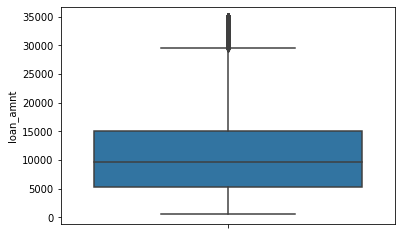

In [461]:
# checking the distribution of loan_amnt
sns.boxplot(y=df_withoutCurrent.loan_amnt)
plt.show()

In [462]:
# A new derived metric to make the analysis simpler
df_withoutCurrent['loan_amnt_bucket'] = pd.cut(df['loan_amnt'], [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'K' for x in range (0, 35, 5)])

D:\Programs\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [463]:
# From this bar graph, we can see that most of the loan amounts fall in 5-10K range
#sns.countplot(df.loan_amnt_bucket, order = df.loan_amnt_bucket.value_counts().index)

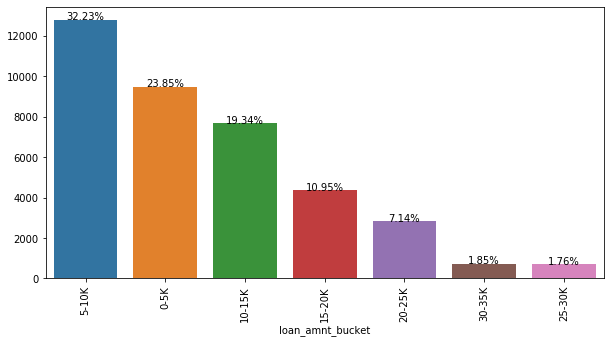

In [464]:
loan_amnt_bucket_count = df_withoutCurrent.groupby('loan_amnt_bucket').id.count().sort_values(ascending = False)

plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
plt_loan_amnt_bucket = sns.barplot(x=loan_amnt_bucket_count.index, y=loan_amnt_bucket_count.values, order = loan_amnt_bucket_count.index)

# For displaying values in bar plot
for i, item in loan_amnt_bucket_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_loan_amnt_bucket.text(i, item, str(round(item/len(df)*100, 2)) + '%', color="black", ha="center")
plt.show()

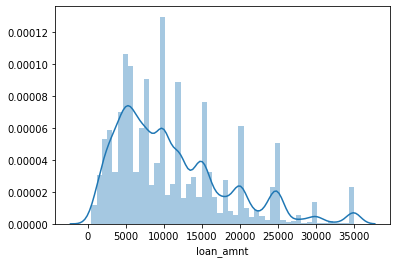

In [465]:
#from the graph, it looks like relatively higher number of loans were issued in rounded figures such as 5000, 10000, 12000, 15000, 20000, 25000, 30000 and 35000
# also, don't see outliers, mean and median are comparable.
sns.distplot(df_withoutCurrent.loan_amnt)
plt.show()

In [466]:
# almost 75% of the loans were below 15,000; As we have observed earlier, most of the loans (32%) are fall in the range 5-10K
df_withoutCurrent.groupby('loan_amnt_bucket')['id'].count() * 100/  len(df.index)

loan_amnt_bucket
0-5K      23.848730
5-10K     32.233049
10-15K    19.344361
15-20K    10.949971
20-25K     7.140519
25-30K     1.762469
30-35K     1.850593
Name: id, dtype: float64

In [467]:
# Idea is to find the percentage of Charged Off loans in each loan_amnt_bucket.
grouped = df_withoutCurrent.groupby(['loan_status', 'loan_amnt_bucket'])['loan_amnt_bucket'].count()
grouped

loan_status  loan_amnt_bucket
Charged Off  0-5K                 1314
             5-10K                1642
             10-15K               1055
             15-20K                751
             20-25K                542
             25-30K                143
             30-35K                180
Fully Paid   0-5K                 8158
             5-10K               11160
             10-15K               6628
             15-20K               3598
             20-25K               2294
             25-30K                557
             30-35K                555
Name: loan_amnt_bucket, dtype: int64

In [468]:
# Converting it to more useful shape
gp_unstacked = grouped.unstack(level=-1)
gp_unstacked

loan_amnt_bucket,0-5K,5-10K,10-15K,15-20K,20-25K,25-30K,30-35K
loan_status,,,,,,,
Charged Off,1314,1642,1055,751,542,143,180
Fully Paid,8158,11160,6628,3598,2294,557,555


In [469]:
# total number in each loan_amnt_bucket to find the percentage
grouped_loan_amnt = df_withoutCurrent.groupby('loan_amnt_bucket')['loan_amnt_bucket'].count()
grouped_loan_amnt

loan_amnt_bucket
0-5K       9472
5-10K     12802
10-15K     7683
15-20K     4349
20-25K     2836
25-30K      700
30-35K      735
Name: loan_amnt_bucket, dtype: int64

In [470]:
# Percentage of Charged Off in each loan_amnt_bucket
perc = gp_unstacked * 100 / grouped_loan_amnt
perc

loan_amnt_bucket,0-5K,5-10K,10-15K,15-20K,20-25K,25-30K,30-35K
loan_status,,,,,,,
Charged Off,13.872466,12.826121,13.731615,17.268338,19.111425,20.428571,24.489796
Fully Paid,86.127534,87.173879,86.268385,82.731662,80.888575,79.571429,75.510204


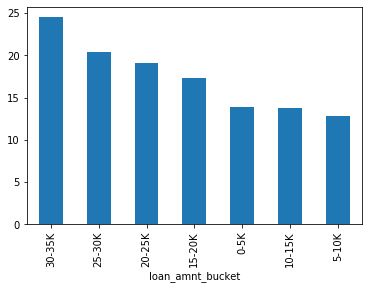

In [471]:
# we are interested only in Charged Off values
perc.loc["Charged Off"].sort_values(ascending = False).plot.bar()

# from this plot, it is clear that higher the loan amount higher the risk of loan getting defaulted.
# Also, risk of default is gradually increasing as the loan amount increases.
# This indicates that bank has to reduce giving big loans as it carry high risk.
# This could be one of the driver variables.

### Observations
- Almost 75% of the loans were below 15,000; Most of the loans (32%) fall in the range 5-10K.
- Relatively higher number of loans were issued in rounded figures such as 5000, 10000, 12000, 15000, 20000, 25000, 30000 and 35000.
- Not many outliers.
- Higher the loan amount higher the risk of loan getting defaulted. Also, risk is gradually increasing as the loan amount increases.
- Bank has to reduce giving big loans as it carry high risk.

### Variable: term

In [472]:
# among all loans, 73.25% of them were short term
df_withoutCurrent.groupby('term')['id'].count() * 100 / len(df.index)

term
 36     73.258302
 60     23.871390
Name: id, dtype: float64

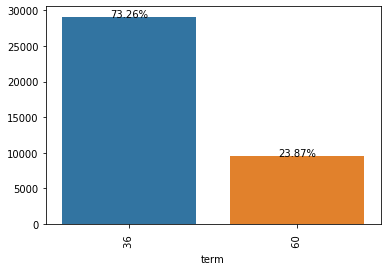

In [473]:
term_count = df_withoutCurrent.groupby('term').id.count().sort_values(ascending = False)

plt.xticks(rotation = 90)
plt_term_count = sns.barplot(x=term_count.index, y=term_count.values, order = term_count.index)

# For displaying values in bar plot
for i, item in term_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_term_count.text(i, item, str(round(item/len(df)*100, 2)) + '%', color="black", ha="center")
plt.show()

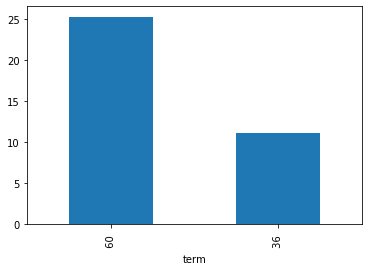

In [474]:
grouped_ls_term = df_withoutCurrent.groupby(['loan_status', 'term'])['term'].count()
grouped_ls_term = grouped_ls_term.unstack(level=-1)
grouped_term = df_withoutCurrent.groupby('term')['term'].count()
perc_term = grouped_ls_term * 100 / grouped_term
#perc_term
perc_term.loc["Charged Off"].sort_values(ascending = False).plot.bar()


### Observations:
- Almost 74% of total loans were short term, 36 months
- Almost 25% of long term loans were Charged Off, so it's evident that long term loans are risker
- It's suggested to reduce long term loans as it carry high risk

### Variable: int_rate

In [475]:
df_withoutCurrent.int_rate.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
10%          7.140000
20%          7.900000
30%          9.990000
40%         10.990000
50%         11.710000
60%         12.840000
70%         13.800000
80%         15.210000
90%         16.820000
99%         20.990000
max         24.400000
Name: int_rate, dtype: float64

In [476]:
# Creating buckets for interests
df_withoutCurrent['int_rate_bucket'] = pd.cut(df_withoutCurrent['int_rate'], [x for x in range(5, 30, 5)], labels=[str(x)+'-'+str(x+5)+'%' for x in range (5, 25, 5)])

D:\Programs\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [477]:
df_withoutCurrent.groupby('int_rate_bucket')['id'].count()

int_rate_bucket
5-10%     12316
10-15%    18265
15-20%     7226
20-25%      770
Name: id, dtype: int64

In [478]:
# from the below result, it can be seen that 10-15% is the interest rates of most of the loans
df_withoutCurrent.groupby('int_rate_bucket')['id'].count() * 100/  len(df_withoutCurrent.index)

int_rate_bucket
5-10%     31.925759
10-15%    47.346865
15-20%    18.731368
20-25%     1.996008
Name: id, dtype: float64

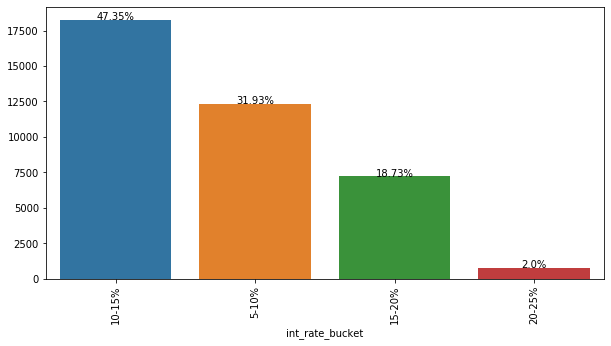

In [479]:
rate_count = df_withoutCurrent.groupby('int_rate_bucket').id.count().sort_values(ascending = False)

plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
plt_rate_count = sns.barplot(x=rate_count.index, y=rate_count.values, order = rate_count.index)

# For displaying values in bar plot
for i, item in rate_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_rate_count.text(i, item, str(round(item/len(df_withoutCurrent)*100, 2)) + '%', color="black", ha="center")
plt.show()

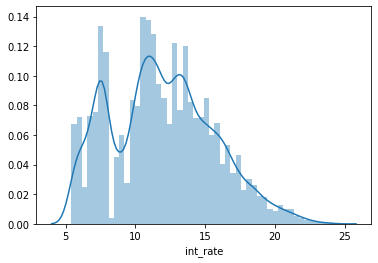

In [480]:
sns.distplot(df_withoutCurrent.int_rate)
plt.show()

In [481]:
grouped_by_ls_irb = df_withoutCurrent.groupby(['loan_status', 'int_rate_bucket'])['int_rate_bucket'].count()
grouped_by_ls_irb

loan_status  int_rate_bucket
Charged Off  5-10%                830
             10-15%              2707
             15-20%              1794
             20-25%               296
Fully Paid   5-10%              11486
             10-15%             15558
             15-20%              5432
             20-25%               474
Name: int_rate_bucket, dtype: int64

In [482]:
grouped_by_ls_irb = grouped_by_ls_irb.unstack(level=-1)
grouped_by_ls_irb

int_rate_bucket,5-10%,10-15%,15-20%,20-25%
loan_status,,,,
Charged Off,830,2707,1794,296
Fully Paid,11486,15558,5432,474


In [483]:
gp_by_rate = df_withoutCurrent.groupby(['int_rate_bucket'])['int_rate_bucket'].count()
gp_by_rate

int_rate_bucket
5-10%     12316
10-15%    18265
15-20%     7226
20-25%      770
Name: int_rate_bucket, dtype: int64

In [484]:
# Percentage of defaulters in each tax bucket
perc_rate = grouped_by_ls_irb * 100 / gp_by_rate
perc_rate

int_rate_bucket,5-10%,10-15%,15-20%,20-25%
loan_status,,,,
Charged Off,6.739201,14.820695,24.827014,38.441558
Fully Paid,93.260799,85.179305,75.172986,61.558442


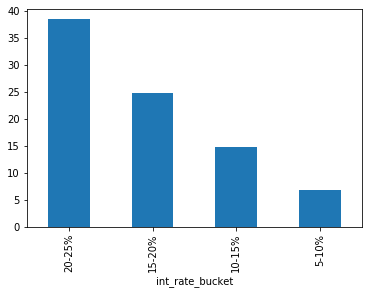

In [485]:
perc_rate.loc["Charged Off"].sort_values(ascending = False).plot.bar()

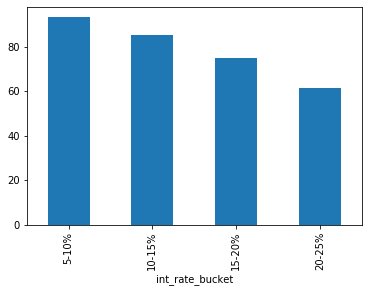

In [486]:
perc_rate.loc["Fully Paid"].sort_values(ascending = False).plot.bar()

### Observations
- Most of the loans that were provided fall in the range of 10-15% interest rates
- If calculated interested rate is more than 15%, then it is not adivsable to give loans of huge amounts as the risk is higher.
- From the plots, it is clear that a higher risk is associated with high interest rates. 

### Variable: grade

In [487]:
df_withoutCurrent.groupby('grade')['id'].count() * 100/  len(df_withoutCurrent.index)

grade
A    26.038831
B    30.264147
C    20.307437
D    13.181429
E     6.903077
F     2.530005
G     0.775073
Name: id, dtype: float64

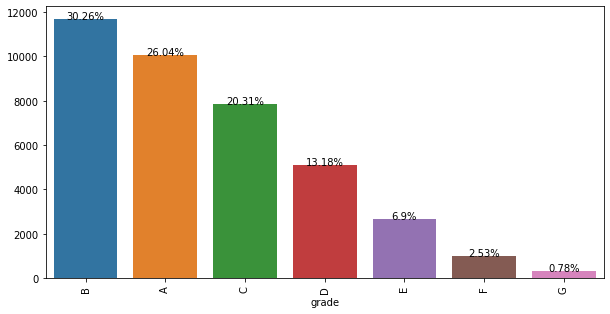

In [488]:
grade_count = df_withoutCurrent.groupby('grade').id.count().sort_values(ascending = False)

plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
plt_grade_count = sns.barplot(x=grade_count.index, y=grade_count.values, order = grade_count.index)

# For displaying values in bar plot
for i, item in grade_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_grade_count.text(i, item, str(round(item/len(df_withoutCurrent)*100, 2)) + '%', color="black", ha="center")
plt.show()
# we can see that most popular loan is B

In [489]:
grouped_ls_grade = df_withoutCurrent.groupby(['loan_status', 'grade'])['grade'].count()
grouped_ls_grade = grouped_ls_grade.unstack(level=-1)
grouped_grade = df_withoutCurrent.groupby('grade')['grade'].count()
perc_grade = grouped_ls_grade * 100 / grouped_grade
perc_grade

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,5.993031,12.205567,17.194281,21.986234,26.849418,32.684426,33.779264
Fully Paid,94.006969,87.794433,82.805719,78.013766,73.150582,67.315574,66.220736


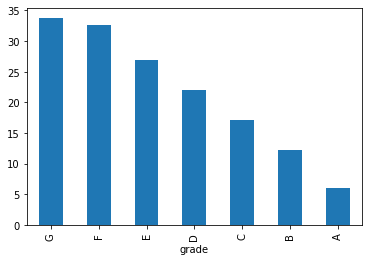

In [490]:
perc_grade.loc["Charged Off"].sort_values(ascending = False).plot.bar()

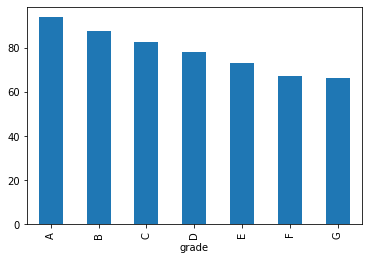

In [491]:
perc_grade.loc["Fully Paid"].sort_values(ascending = False).plot.bar()

### Observations:
- Top 3 popular loan grades are B, A and C
- Almost 30% of the loans are grade B
- It seems that lower grade loans such as G, F, E are riskier
- On the other hand, A, B and C good loans
- More than 30% of G-grade loans were defaulted and it carries the highest risk.
- It is recommended to stop giving loans with lower grades

### Variable: emp_length

In [492]:
# Need to correct two versions of 1
df_withoutCurrent['emp_length'] = df_withoutCurrent['emp_length'].str.strip()
(df_withoutCurrent.groupby('emp_length')['id'].count()).sort_values(ascending=False)

D:\Programs\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: id, dtype: int64

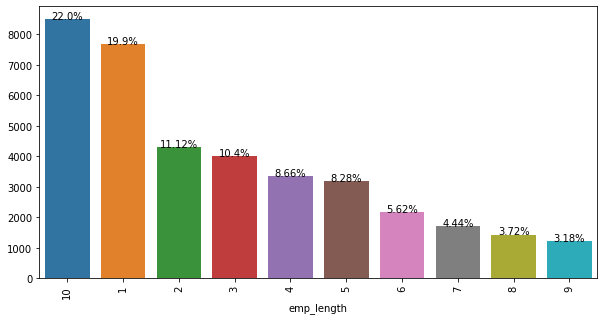

In [493]:
emp_length_count = df_withoutCurrent.groupby('emp_length').id.count().sort_values(ascending = False)

plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
plt_emp_length_count = sns.barplot(x=emp_length_count.index, y=emp_length_count.values, order = emp_length_count.index)

# For displaying values in bar plot
for i, item in emp_length_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_emp_length_count.text(i, item, str(round(item/len(df_withoutCurrent)*100, 2)) + '%', color="black", ha="center")
plt.show()

# almost 22% of the loans were given to 10+ years experienced people

In [494]:
# Analysing the impact on loan_status column; 
grouped_ls_exp = df_withoutCurrent.groupby(['loan_status', 'emp_length'])['emp_length'].count()
grouped_ls_exp = grouped_ls_exp.unstack(level=-1)
grouped_exp = df_withoutCurrent.groupby('emp_length')['emp_length'].count()
perc_exp = grouped_ls_exp * 100 / grouped_exp
perc_exp.loc["Charged Off"].sort_values(ascending = False)

emp_length
10    15.680961
7     15.371128
5     14.339386
1     14.263384
6     14.160517
8     14.146341
3     13.833500
4     13.824057
2     13.213703
9     12.887439
Name: Charged Off, dtype: float64

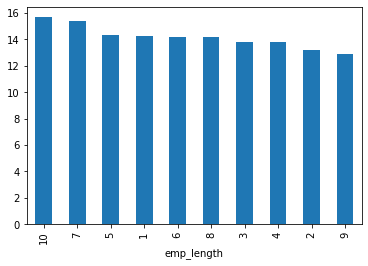

In [495]:
perc_exp.loc["Charged Off"].sort_values(ascending = False).plot.bar()

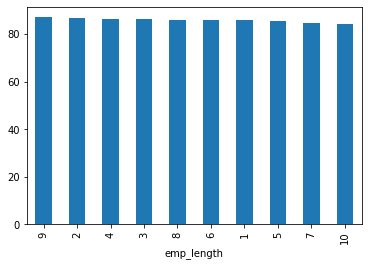

In [496]:
perc_exp.loc["Fully Paid"].sort_values(ascending = False).plot.bar()

### Observations:
- Most of the loans (22%) were issued to people have 10 or more years of experience
- Surprisingly, second largest borrowers (~20%) were the people with 1 or less year of experience.
- No significant impact found on loan status

### Variable: home_ownership

In [497]:
df.groupby('home_ownership').size() * 100 / len(df.index)

home_ownership
MORTGAGE    44.462069
NONE         0.007553
OTHER        0.246746
OWN          7.699474
RENT        47.584158
dtype: float64

In [498]:
#(df.groupby('home_ownership').size() * 100 / len(df.index)).sort_values(ascending = False).plot.bar()

In [499]:
# from the plot, it is clear that the most of the people who have taken loans have thier home on rent or on mortgage
#sns.countplot(df.home_ownership, order = df.home_ownership.value_counts().index)

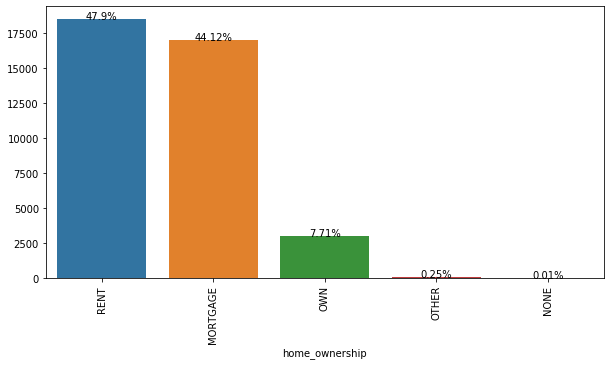

In [500]:
home_ownership_count = df_withoutCurrent.groupby('home_ownership').id.count().sort_values(ascending = False)

plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
plt_home_ownership_count = sns.barplot(x=home_ownership_count.index, y=home_ownership_count.values, order = home_ownership_count.index)

# For displaying values in bar plot
for i, item in home_ownership_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_home_ownership_count.text(i, item, str(round(item/len(df_withoutCurrent)*100, 2)) + '%', color="black", ha="center")
plt.show()
# from the plot, it is clear that the most of the people who have taken loans have thier home on rent or on mortgage

In [501]:
# Analysing the impact on loan_status column; 
grouped_ls_home_ownership = df_withoutCurrent.groupby(['loan_status', 'home_ownership'])['home_ownership'].count()
# changing it to useful shape
grouped_ls_home_ownership = grouped_ls_home_ownership.unstack(level=-1)
grouped_home_ownership = df_withoutCurrent.groupby('home_ownership')['home_ownership'].count()
perc_home_ownership = grouped_ls_home_ownership * 100 / grouped_home_ownership
perc_home_ownership.loc["Charged Off"].sort_values(ascending = False)

home_ownership
OTHER       18.367347
RENT        15.362554
OWN         14.890756
MORTGAGE    13.671347
NONE              NaN
Name: Charged Off, dtype: float64

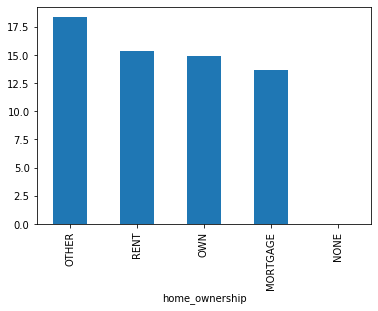

In [502]:
perc_home_ownership.loc["Charged Off"].sort_values(ascending = False).plot.bar()

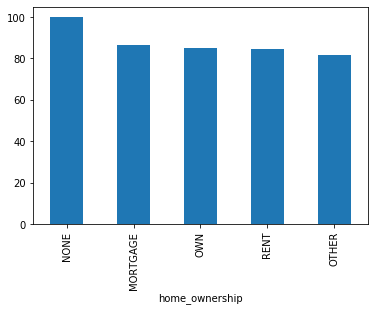

In [503]:
perc_home_ownership.loc["Fully Paid"].sort_values(ascending = False).plot.bar()

### Obseravations:
- It is clear from the analysis that most of the people who have taken loans have their home on rent or on mortgage.
- They account for almost 92% of the total loans.
- The most risky categoy is 'Others'. Almost 18% of people from this category defaulted their loans.
- It is suggested to stop giving loans to people who belong to 'Other' category. Even though defaulters from other categories are comparable, have caution while giving loans to people who have their home on rent also.

### Variable: annual_inc

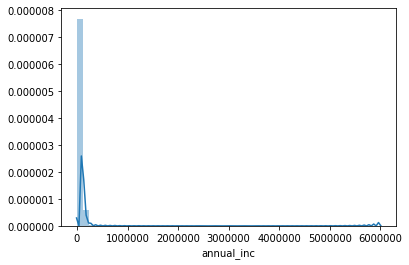

In [504]:
sns.distplot(df_withoutCurrent.annual_inc)
plt.show()
# From the distribution, we can see it is right skewed.

In [505]:
# potential to segregate into different buckets as we have values mainly from 3 different ranges
df_withoutCurrent.annual_inc.describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8, .85, .9,.95, .98, .99])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
10%      3.000000e+04
20%      3.719616e+04
25%      4.000000e+04
30%      4.450000e+04
40%      5.000400e+04
50%      5.886800e+04
60%      6.500400e+04
70%      7.500000e+04
75%      8.200000e+04
80%      9.000000e+04
85%      1.000000e+05
90%      1.150000e+05
95%      1.400040e+05
98%      1.870000e+05
99%      2.341440e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

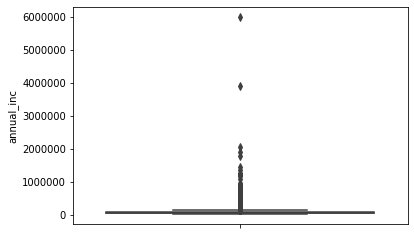

In [506]:
# to check the presence of outliers
sns.boxplot(y=df_withoutCurrent.annual_inc)
plt.show()

In [507]:
# removing outliers based on the logic:- if a value is greater than or equal to (3 * std) + mean, consider it as outlier
df_withoutCurrent = df_withoutCurrent[df_withoutCurrent.annual_inc <= (3*df_withoutCurrent.annual_inc.std() + df_withoutCurrent.annual_inc.mean())]

In [508]:
df_withoutCurrent.annual_inc.describe(percentiles=[.25, .35, .75, .85, .90, .95, .99])

count     38298.000000
mean      65820.376936
std       36385.799971
min        4000.000000
25%       40000.000000
35%       48000.000000
50%       58000.000000
75%       81000.000000
85%       99867.000000
90%      112996.500000
95%      135829.400000
99%      200000.000000
max      260735.000000
Name: annual_inc, dtype: float64

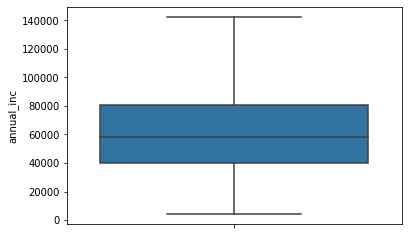

In [509]:
sns.boxplot(y=df_withoutCurrent.annual_inc,  showfliers=False)
plt.show()
# from the below plot, it is clear that 75% people have income less than 80,000$

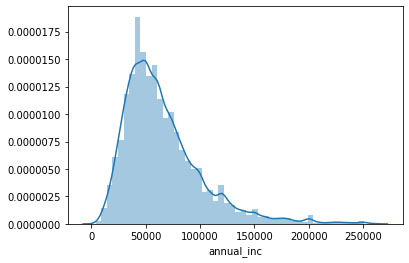

In [510]:
sns.distplot(df_withoutCurrent.annual_inc)

In [511]:
# binning the annual income
df_withoutCurrent['annual_inc_bucket'] = pd.cut(df_withoutCurrent['annual_inc'], [x for x in range(0, 200000, 10000)], labels=[str(x)+'-'+str(x+10)+'K' for x in range (0, 190, 10)])
#df_withoutCurrent[['annual_inc', 'annual_inc_bucket']].head(50)

In [512]:
df_withoutCurrent.groupby('annual_inc_bucket')['annual_inc_bucket'].count()

annual_inc_bucket
0-10K         98
10-20K      1082
20-30K      3371
30-40K      5147
40-50K      5691
50-60K      5572
60-70K      4096
70-80K      3525
80-90K      2510
90-100K     2004
100-110K    1230
110-120K    1098
120-130K     731
130-140K     487
140-150K     449
150-160K     261
160-170K     170
170-180K     214
180-190K     106
Name: annual_inc_bucket, dtype: int64

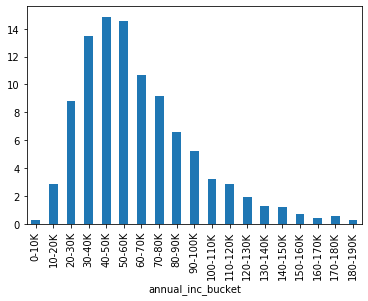

In [513]:
(df_withoutCurrent.groupby('annual_inc_bucket')['id'].count() * 100/ len(df_withoutCurrent)).plot.bar()

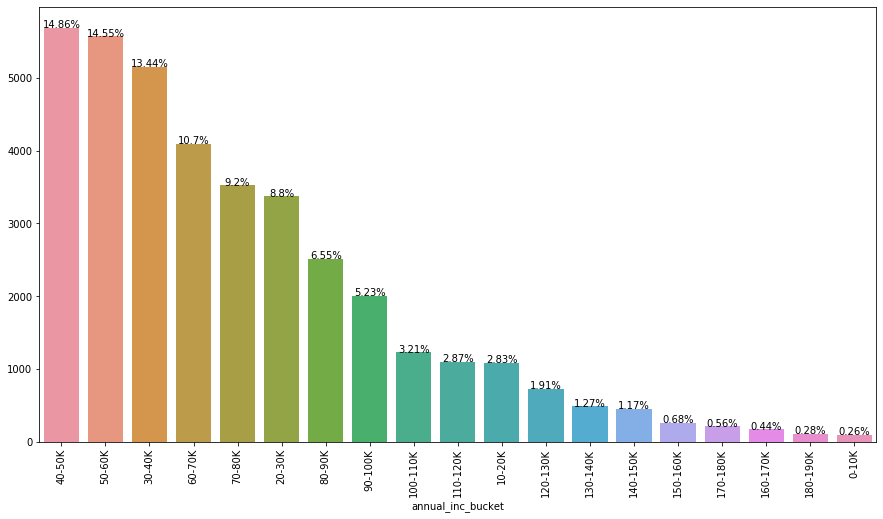

In [514]:
annual_inc_bucket_count = df_withoutCurrent.groupby('annual_inc_bucket').id.count().sort_values(ascending = False)

plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
plt_annual_inc_bucket_count = sns.barplot(x=annual_inc_bucket_count.index, y=annual_inc_bucket_count.values, order = annual_inc_bucket_count.index)

# For displaying values in bar plot
for i, item in annual_inc_bucket_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_annual_inc_bucket_count.text(i, item, str(round(item/len(df_withoutCurrent)*100, 2)) + '%', color="black", ha="center")
plt.show()

In [515]:
# Analysing the impact on loan_status column; 
grouped_ls_annual_inc_bucket = df_withoutCurrent.groupby(['loan_status', 'annual_inc_bucket'])['annual_inc_bucket'].count()
# changing it to useful shape
grouped_ls_annual_inc_bucket = grouped_ls_annual_inc_bucket.unstack(level=-1)
grouped_annual_inc_bucket = df_withoutCurrent.groupby('annual_inc_bucket')['annual_inc_bucket'].count()
perc_annual_inc_bucket = grouped_ls_annual_inc_bucket * 100 / grouped_annual_inc_bucket
perc_annual_inc_bucket.loc["Charged Off"].sort_values(ascending = False)

annual_inc_bucket
0-10K       20.408163
10-20K      20.055453
20-30K      17.858202
30-40K      17.719060
50-60K      15.559943
40-50K      15.146723
180-190K    14.150943
150-160K    13.793103
60-70K      13.647461
70-80K      13.191489
80-90K      12.151394
130-140K    11.704312
90-100K     11.277445
120-130K    10.943912
170-180K    10.747664
140-150K    10.690423
110-120K    10.564663
100-110K    10.406504
160-170K     7.647059
Name: Charged Off, dtype: float64

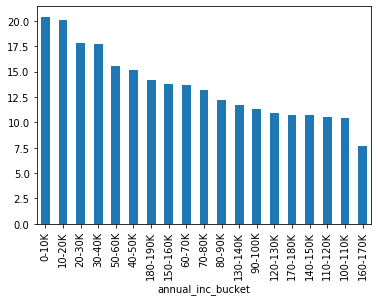

In [516]:
perc_annual_inc_bucket.loc["Charged Off"].sort_values(ascending = False).plot.bar()

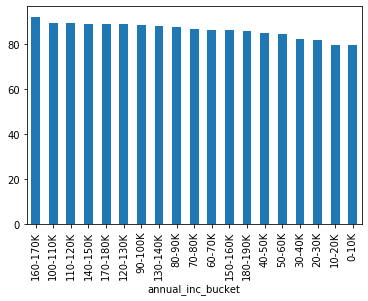

In [517]:
perc_annual_inc_bucket.loc["Fully Paid"].sort_values(ascending = False).plot.bar()

### Observations:
- The number of loans issued to people with lower income were relatively less.
- 75% of the borrowers had an annual income equal to or lower than 80,000$.
- From the analysis, it looked like people with a lower income are riskier
- Almost 20% of loans were defaulted in the 0-10K and 10-20K category.
- Almost 17.5% of loans were defaulted in the 20-30K and 30-40K category. In these categories, the number of loans issued was significantly higher in 30-40K category.

### Variable: verification_status

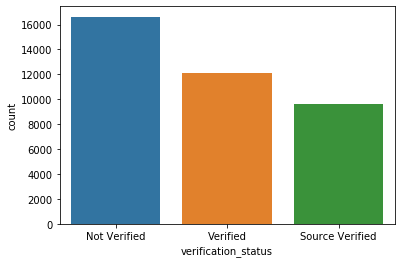

In [518]:
sns.countplot(df_withoutCurrent.verification_status, order = df_withoutCurrent.verification_status.value_counts().index)
# from the plot, most of the people belong to 'Not Verified' category

In [519]:
# From the below figures, it is clear that almost 42.6% people have 'Not Verified' status
df_withoutCurrent.groupby('verification_status').size() * 100 / len(df_withoutCurrent.index)

verification_status
Not Verified       43.404355
Source Verified    25.035250
Verified           31.560395
dtype: float64

In [520]:
# in percentages
#(df_withoutCurrent.groupby('verification_status').size() * 100 / len(df.index)).sort_values(ascending=False).plot.bar()
df_withoutCurrent.groupby('verification_status')['verification_status'].count()

verification_status
Not Verified       16623
Source Verified     9588
Verified           12087
Name: verification_status, dtype: int64

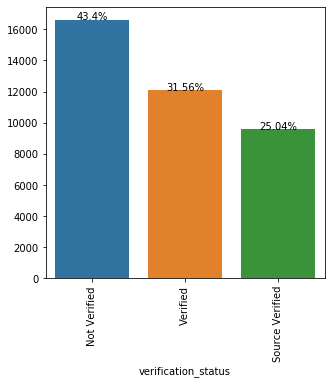

In [521]:
verification_status_count = df_withoutCurrent.groupby('verification_status').id.count().sort_values(ascending = False)

plt.figure(figsize = (5,5))
plt.xticks(rotation = 90)
plt_verification_status_count = sns.barplot(x=verification_status_count.index, y=verification_status_count.values, order = verification_status_count.index)

# For displaying values in bar plot
for i, item in verification_status_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_verification_status_count.text(i, item, str(round(item/len(df_withoutCurrent)*100, 2)) + '%', color="black", ha="center")
plt.show()

In [522]:
# Analysing the impact on loan_status column; 
grouped_ls_vs = df_withoutCurrent.groupby(['loan_status', 'verification_status'])['verification_status'].count()
# changing it to useful shape
grouped_ls_vs = grouped_ls_vs.unstack(level=-1)
grouped_vs = df_withoutCurrent.groupby('verification_status')['verification_status'].count()
perc_vs = grouped_ls_vs * 100 / grouped_vs
perc_vs.loc["Charged Off"].sort_values(ascending = False)

verification_status
Verified           16.861090
Source Verified    14.862328
Not Verified       12.837635
Name: Charged Off, dtype: float64

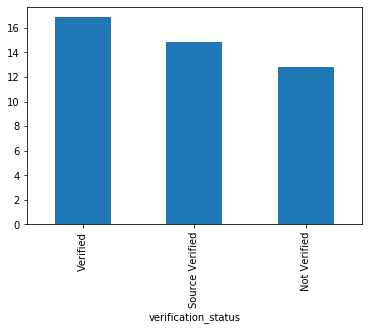

In [523]:
perc_vs.loc["Charged Off"].sort_values(ascending = False).plot.bar()

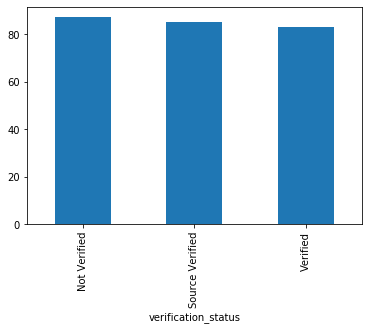

In [524]:
perc_vs.loc["Fully Paid"].sort_values(ascending = False).plot.bar()

### Observations:
- Most of the loans were issued to the people whose income was 'Not Verified', about 43%
- Ironically, most risky borrowers were those whose income was verified.

### Variable: issue_d


In [525]:
df_withoutCurrent['issue_year'] = df_withoutCurrent['issue_d'].dt.year

In [526]:
# add a new derived metric, month
df_withoutCurrent['issue_month'] = df_withoutCurrent['issue_d'].dt.month

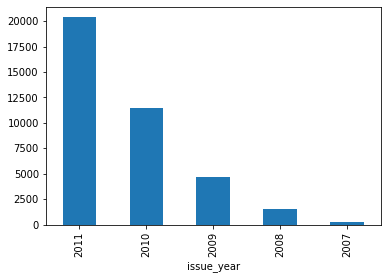

In [527]:
# from the bar chart, we can see that max number of loans are issued in 2011. 
# The number was increasing rapidly from the year 2007
(df_withoutCurrent.groupby('issue_year')['id'].count()).sort_values(ascending = False).plot.bar()

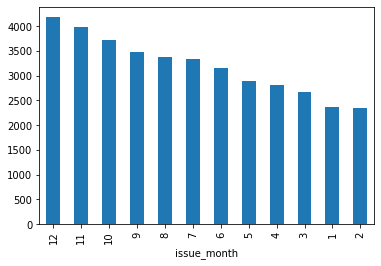

In [528]:
(df_withoutCurrent.groupby('issue_month')['id'].count()).sort_values(ascending = False).plot.bar()

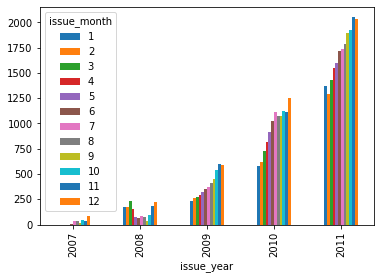

In [529]:
(df_withoutCurrent.groupby(['issue_year', 'issue_month'])['id'].count()).unstack(level=-1).plot.bar()

In [530]:
# Analysing the impact on loan_status column; 
grouped_ls_year = df_withoutCurrent.groupby(['loan_status', 'issue_year'])['issue_year'].count()
# changing it to useful shape
grouped_ls_year = grouped_ls_year.unstack(level=-1)
grouped_year = df_withoutCurrent.groupby('issue_year')['issue_year'].count()
perc_year = grouped_ls_year * 100 / grouped_year
perc_year.loc["Charged Off"].sort_values(ascending = False)

issue_year
2007    17.338710
2011    15.922254
2008    15.809769
2010    12.866008
2009    12.652276
Name: Charged Off, dtype: float64

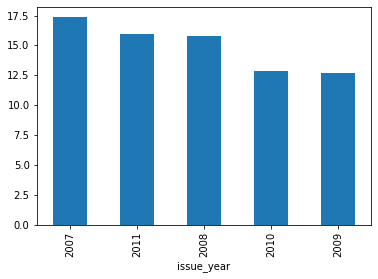

In [531]:
perc_year.loc["Charged Off"].sort_values(ascending = False).plot.bar()

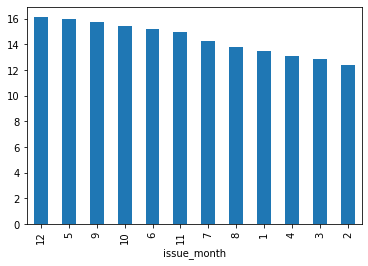

In [532]:
# Analysing the impact on loan_status column; 
grouped_ls_month = df_withoutCurrent.groupby(['loan_status', 'issue_month'])['issue_month'].count()
# changing it to useful shape
grouped_ls_month = grouped_ls_month.unstack(level=-1)
grouped_month = df_withoutCurrent.groupby('issue_month')['issue_month'].count()
perc_month = grouped_ls_month * 100 / grouped_month
perc_month.loc["Charged Off"].sort_values(ascending = False).plot.bar()

#### Observations
- Most number of loans were issued in the year 2011.
- There was a gradual increase in the number of loans issued over the years
- The number of loans were gradually rising from Jan-Dec in almost all the years.
- December has witnessed the most number of loan issual.
- From the analysis, this variable has no significant impact on the loan status

### Variable: loan_status

In [533]:
# almost 14.16% loans were defaulted.
df_withoutCurrent.groupby('loan_status')['id'].count()

loan_status
Charged Off     5597
Fully Paid     32701
Name: id, dtype: int64

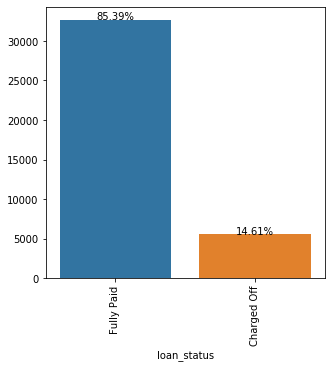

In [534]:
loanstatus_count = df_withoutCurrent.groupby('loan_status').id.count().sort_values(ascending = False)

plt.figure(figsize = (5,5))
plt.xticks(rotation = 90)
plt_loanstatus_count = sns.barplot(x=loanstatus_count.index, y=loanstatus_count.values, order = loanstatus_count.index)

# For displaying values in bar plot
for i, item in loanstatus_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_loanstatus_count.text(i, item, str(round(item/len(df_withoutCurrent)*100, 2)) + '%', color="black", ha="center")
plt.show()

#### Observations:
- 85% percentage of the loans were full paid and 15% loans were defaulted

In [535]:
# saving to excel to visualise the data 
df_withoutCurrent.to_csv("after_uni.csv")

## Bivariate analysis

#### loan_amnt vs annual_inc_bucket

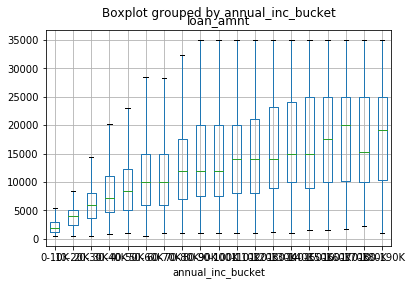

In [536]:
# Let's see if we get some interesting trends
df_withoutCurrent.boxplot(column='loan_amnt', by='annual_inc_bucket', showfliers=False)

#### Observations:
- The loan amount given to the people from 100-500K bracket seemed to be higer than other categories.

#### loan_amnt vs term

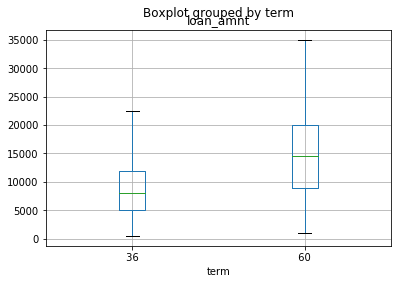

In [537]:
df_withoutCurrent.boxplot(column='loan_amnt', by='term',showfliers=False)

#### Observations:
- Long term loans were relatively bigger loans.
- The mean loan amont of 36-term loans was ~7500 and that of 60-term loans was ~15,000 (approximately double).
- In 36-months loans, 75% of loans were below 12.5K whereas in 60-months loans, it was below 20K.

#### loan_amnt vs grade

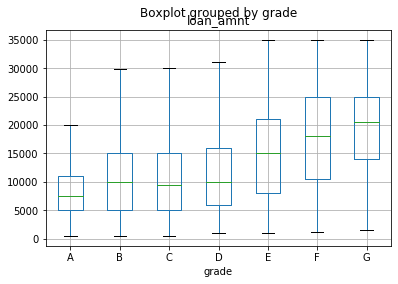

In [538]:
df_withoutCurrent.boxplot(column='loan_amnt', by='grade', showfliers=False)

#### Observations: 
- Lower grade loans were relatively bigger ones.

#### loan_amnt vs emp_length

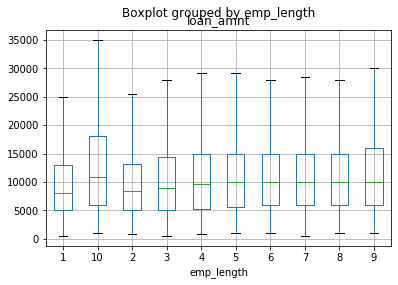

In [539]:
df_withoutCurrent.boxplot(column='loan_amnt', by='emp_length', showfliers=False)

#### Observations:
- Except people with 10 or more years of experience, the range of loan amount was almost same
- The mean loan amount of people with 10 or more years of experience was slightly more than that of others

#### annual_inc vs grade

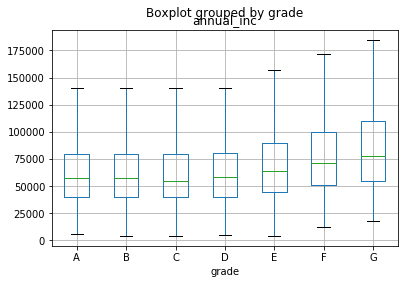

In [540]:
df_withoutCurrent.boxplot(column='annual_inc', by='grade', showfliers=False)

#### Observations:
- The lower grade loans seemed to be given to people with relatively higher annual income
- This may be due to the fact that lower grade loans were relatively bigger loans

#### loan_amnt vs int_rate

In [541]:
# Just checking the correlation between loan amount and int_rate
df_withoutCurrent.loan_amnt.corr(df_withoutCurrent.int_rate)

0.29919284005896285